### Accessing Keras Layers
```python
# Accessing the first layer of a Keras model
first_layer = model.layers[0]

# Printing the layer, and its input, ouptut and weights
print(first_layer.input)
print(first_layer.output)
print(first_layer.weights)
```

### What are tensors?
- Multidimension array of numbers

```python 
# Import Keras.backend as K
import Keras.backend as K 

# Get the input and uptut tensts of a model layer
inp = model.layers[0].input
out = model.layers[0].output

# Function that maps layer inputs to outputs
inp_to_out = K.function([imp], [out])

# We pass and input and get the output we'd get in that first layer
print(inp_to_out([X_train])
```

### Introducing Autoencoders
- Autoencoders are neural networks where the number of inputs matches the number of outputs

### Autoencoders use cases
- Dimensionality reduction:
    - Smaller dimensional space representation of our inputs
- De-noising data:
    - If trained with clean data, irrelevant noisse will be filtered out during reconstruction
- Anomaly detection:
    - A poor reconstruction will result when the model is fed with unseen inputs

### Building a simple autoencoder
```python
# Instantiate a sequential model
autoencoder = Sequential()

# Add a hidden layer of 4 neurons and an input layer of 100
autoencoder.add(Dense(4, input_shape=(100,), activation='relu')
                
# Add a output layer of 100 neurons
autoencoder.add(Dense(100, activation='sigmoid')  
                
# Compile your model with the appropriate loss
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
```

### Breaking it into an encoder
```python
# Building a seperate model to encode inputs
encoder = Sequential()
encoder.add(autoencoder.layers[0])

# Predicting returns the four hidden layer neuron outputs
encoder.predict(X_test)
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
from sklearn.model_selection import train_test_split

In [2]:
sns.set_style('darkgrid')
mpl.rcParams['figure.figsize'] = [15,10]

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.


In [4]:
banknotes = pd.read_csv('data/banknotes.csv')
X = banknotes.drop('class', axis=1)
y = banknotes['class']
X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.3,
                                                   random_state=42)

In [5]:
model = Sequential()

# Add a dense layer 
model.add(Dense(2, input_shape=(4,), activation='sigmoid'))

model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

# Compile your model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Display a summary of your model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Import keras backend
import keras.backend as K

# Input tensor from the 1st layer of the model
inp = model.layers[0].input

# Output tensor from the 1st layer of the model
out = model.layers[0].output

# Define a function from inputs to outputs
inp_to_out = K.function([inp], [out])

# Print the results of passing X_test through the 1st layer
print(inp_to_out([X_test]))

[array([[7.79005885e-02, 1.32193714e-01],
       [7.05681562e-01, 8.47913623e-01],
       [4.38202083e-01, 7.23741651e-01],
       [9.35630798e-02, 9.25032794e-02],
       [2.16964751e-01, 2.69285440e-01],
       [4.46993113e-03, 3.13201547e-03],
       [2.03108698e-01, 8.34044814e-02],
       [2.26134658e-02, 2.45918632e-02],
       [1.77005827e-02, 6.70677423e-03],
       [8.22411776e-02, 1.88690722e-02],
       [5.52062154e-01, 6.98469341e-01],
       [8.58382463e-01, 9.27382708e-01],
       [1.07483566e-02, 1.71092153e-03],
       [6.84295893e-02, 4.06987071e-02],
       [7.45596290e-02, 3.95724177e-03],
       [5.34688592e-01, 9.17421341e-01],
       [4.88940507e-01, 2.93499082e-01],
       [5.57085037e-01, 3.65717769e-01],
       [4.32065129e-03, 7.50929117e-04],
       [2.40248740e-01, 9.41551030e-02],
       [1.34559125e-01, 3.05890799e-01],
       [1.68069303e-02, 3.50579619e-03],
       [2.61505246e-01, 7.96410739e-02],
       [1.15176618e-01, 1.58973664e-01],
       [9.71176

In [7]:
def plot():
  fig, ax = plt.subplots()
  plt.scatter(layer_output[:, 0], layer_output[:, 1],c=y_test,edgecolors='r')
  plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i+1, test_accuracy * 100.0))
  plt.show()

412/412 [==============================] - 0s 167us/step


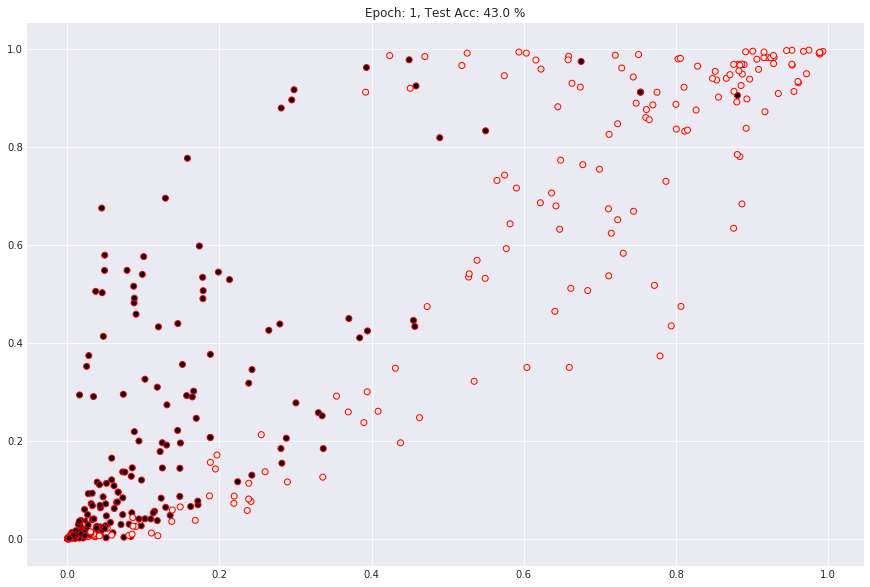

412/412 [==============================] - 0s 45us/step


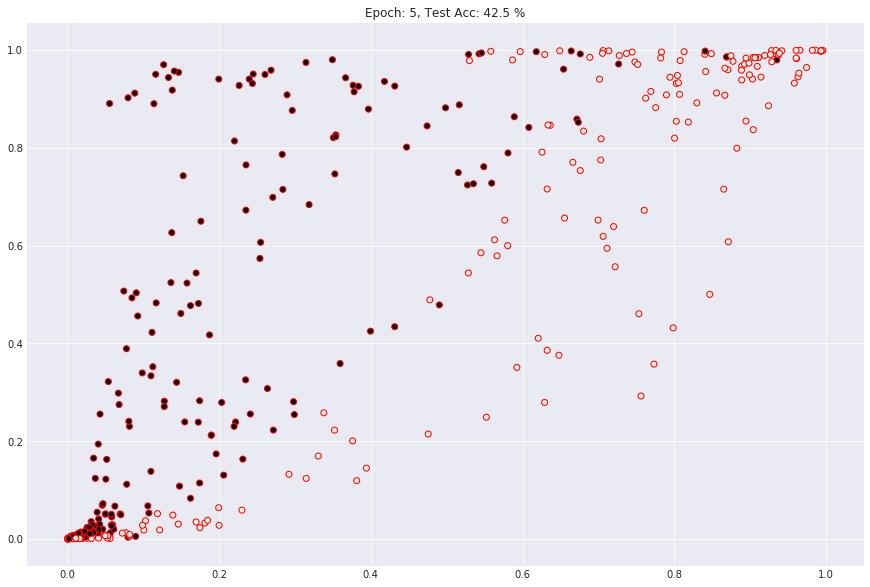

412/412 [==============================] - 0s 42us/step


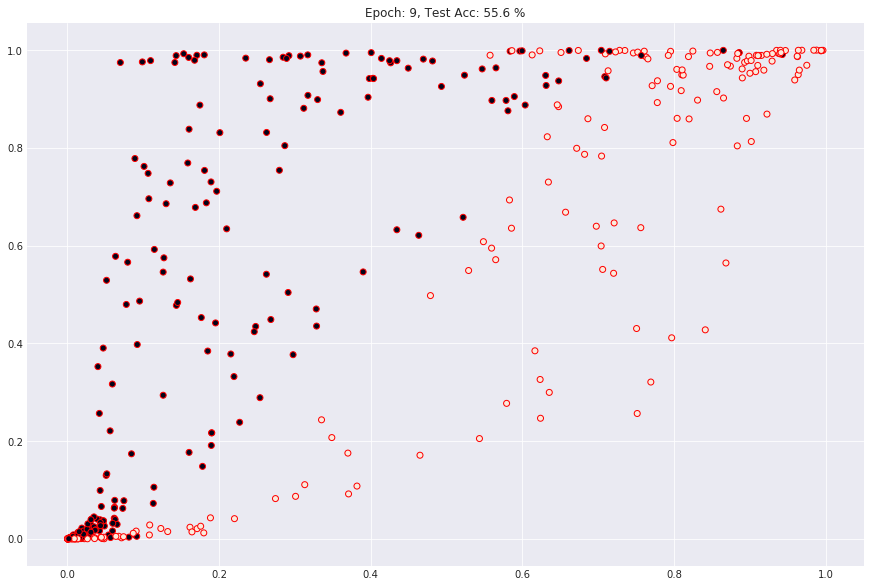

412/412 [==============================] - 0s 50us/step


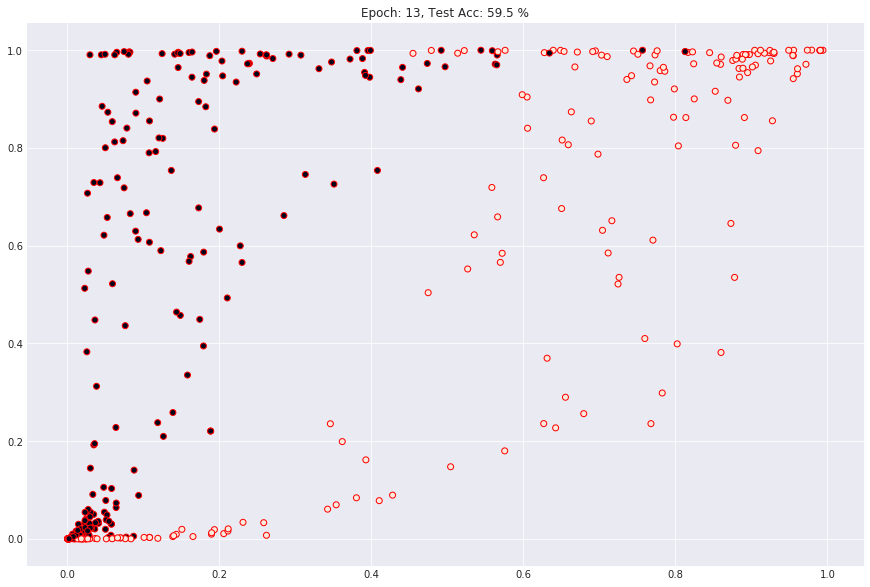

412/412 [==============================] - 0s 35us/step


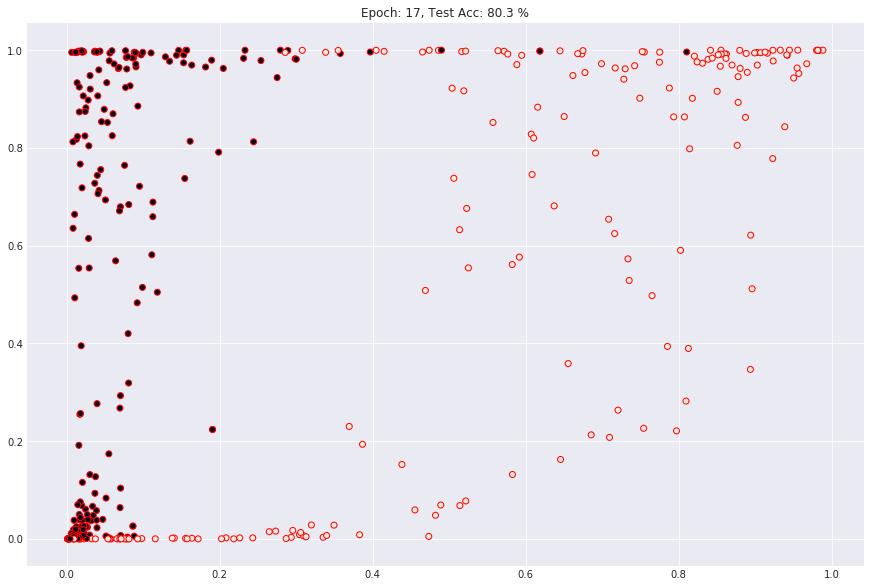

412/412 [==============================] - 0s 29us/step


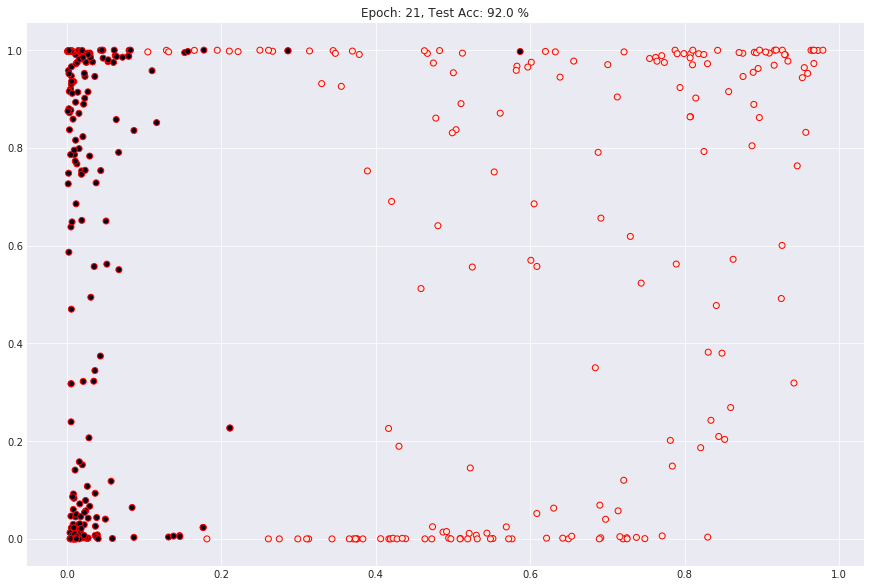

In [8]:
for i in range(0, 21):
  	# Train model for 1 epoch
    h = model.fit(X_train, y_train, batch_size=16, epochs=1,verbose=0)
    if i%4==0: 
      # Get the output of the first layer
      layer_output = inp_to_out([X_test])[0]
      
      # Evaluate model accuracy for this epoch
      test_accuracy = model.evaluate(X_test, y_test)[1] 
      
      # Plot 1st vs 2nd neuron output
      plot()

In [9]:
# Start with a sequential model
autoencoder = Sequential()

# Add a dense layer with the original image as input
autoencoder.add(Dense(32, input_shape=(784, ), activation="relu"))

# Add an output layer with as many nodes as the image
autoencoder.add(Dense(784, activation="sigmoid"))

# Compile your model
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Take a look at your model structure
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [10]:
X_test_noise = np.load('data/MNIST/X_test_MNIST_noise.npy')

In [11]:
def show_encodings(encoded_imgs,number=4):
    n = 5  # how many digits we will display
    original = X_test_noise
    original = original[np.where(y_test == number)]
    encoded_imgs = encoded_imgs[np.where(y_test==number)]
    plt.figure(figsize=(20, 4))
    #plt.title('Original '+str(number)+' vs Encoded representation')
    for i in range(min(n,len(original))):
        # display original imgs
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display encoded imgs
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(np.tile(encoded_imgs[i],(32,1)))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [12]:
def compare_plot(original,decoded_imgs):
    n = 4  # How many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.title('Noisy vs Decoded images')
    plt.show()


<Figure size 1440x288 with 0 Axes>

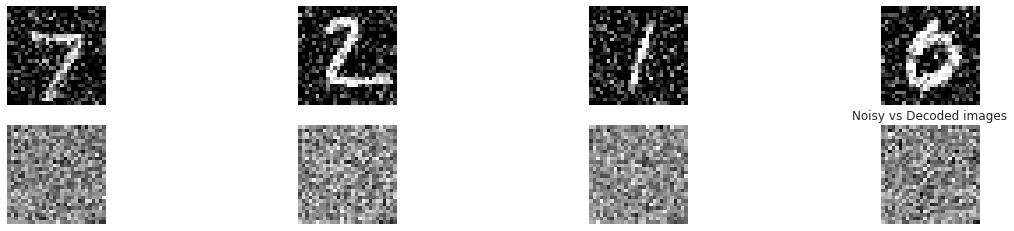

In [13]:
# Build your encoder
encoder = Sequential()
encoder.add(autoencoder.layers[0])

# Encode the images and show the encodings
preds = encoder.predict(X_test_noise)
show_encodings(preds)

# Predict on the noisy images with your autoencoder
decoded_imgs = autoencoder.predict(X_test_noise)

# Plot noisy vs decoded images
compare_plot(X_test_noise, decoded_imgs)

### Intro to CNNs 
```python
# Import Conv2D layer and Flatten form kera layers
from keras.layers import Dense, Conv2D, Flatten

# Instantiate your model as usual
model = Sequential()
# Add a convolutional layer with 32 filters of size 3x3
model.add(Conv2D(filters=32,
                 kernel_size=3, 
                 input_size=(28, 28, 1), 
                 activation='relu')

# Add another convolutional layer
model.add(Conv2D(8, kernel_size=3, activation='relu'))
          
# Flatten the output of the previous layer
model.add(Flatten())
          
# End this multiclass model with 3 outputs and softmax
model.add(Dense(3, activation='softmax'))
```

### Preprocessing images for ResNet50
```python
# Import image from keras preprocessing
from keras.preprocessing import image

# Import preprocess_input from keras applications resnet50
from keras.applications.resnet50 import preprocess_input


# Load the image with the right target siz for your model
img = image.load_img(img_path, target_size=(224, 224))

# Turn it into an array
img = image.img_to_array(img)

# Expand the dimensions so that it's understood by our network:
# img.shape turns from (224, 224, 3) into (1, 224, 224, 3)
img = np.expand_dims(img, axis=0)


# Preprocess the img in the same way traing images were
img = preprocess_input(img)

# Import ResNet50 and decode_predictions from keras.application.resnet50
from keras.applications.resnet50 import ResNet50, decode_predictions

# Instantiate a ResNet50 model with imagenet weights
model = ResNet50(weights='imagenet')

# Predict with ResNet50 on our img
preds = model.predict(img)

# Decode predictions and print it
print('Predicted:', decode_predictions(preds, top=1)[0])

```

In [39]:
X_test = np.load('data/MNIST/X_test_MNIST.npy')
X_test.shape

(100, 784)

In [41]:
# Import the Conv2D and Flatten layers and instantiate model
from keras.layers import Conv2D, Flatten
model = Sequential()

# Add a convolutional layer of 32 filters of size 3x3
model.add(Conv2D(32, input_shape=(28, 28, 1), kernel_size=3, activation='relu'))

# Add a convolutional layer of 16 filters of size 3x3
model.add(Conv2D(16, kernel_size=3, activation='relu'))

# Flatten the previous layer output
model.add(Flatten())

# Add as many outputs as classes with softmax activation
model.add(Dense(10, activation='softmax'))

```python
# Import image and preprocess_input
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input 

# Load the image with the right target size for your model
img = image.load_img(img_path, target_size=(224, 224))

# Turn it into an array
img_array = image.img_to_array(img)

# Expand the dimensions of the image
img_expanded = np.expand_dims(img_array, axis = 0)

# Pre-process the img in the same way original images were
img_ready = img_expanded(img)

```

### Intro to LSTMs
- When to use LSTMs
    - Image captioning
    - Speech to text
    - Text translation
    - Document summarization
    - Text generation
    - Musical composition     

In [49]:
text = 'Hi this is a small sentence'

# We choose a sequence length
seq_len = 3

# Split text into a list of words
words = text.split()
words

['Hi', 'this', 'is', 'a', 'small', 'sentence']

In [50]:
# Make lines
lines = [' '.join(words[i-seq_len:i]) for i in range(seq_len, len(words) + 1)]
lines

['Hi this is', 'this is a', 'is a small', 'a small sentence']

In [52]:
# Import Tokenizer from keras preprocessing text
from keras.preprocessing.text import Tokenizer

# Instantiate Tokenizer
tokenizer = Tokenizer()

# Fit it on the previous lines
tokenizer.fit_on_texts(lines)

# Turn line into numeric sequences
sequences = tokenizer.texts_to_sequences(lines)

sequences

[[5, 3, 1], [3, 1, 2], [1, 2, 4], [2, 4, 6]]

In [53]:
print(tokenizer.index_word)

{1: 'is', 2: 'a', 3: 'this', 4: 'small', 5: 'hi', 6: 'sentence'}


In [55]:
# Import Dense, LSTM and Embedding layers
from keras.layers import Dense, LSTM, Embedding
model = Sequential()

# Vocabulary size
vocab_size = len(tokenizer.index_word) + 1

# Starting with an embedding layer
model.add(Embedding(input_dim=vocab_size, output_dim=8, input_length=2))

# Adding an LSTM layer
model.add(LSTM(8))

# Adding a Dense hidden layer
model.add(Dense(8, activation='relu'))

# Adding an output layer with softmax
model.add(Dense(vocab_size, activation='softmax'))

In [56]:
text = '''it is not the strength of the body but the strength 
of the spirit it is useless to meet revenge with revenge it 
will heal nothing even the smallest person can change the course 
of history all we have to decide is what to do with the time that 
is given us the burned hand teaches best after that advice about 
fire goes to the heart'''

In [59]:
# Split text into an array of words 
words = text.split()

# Make lines of 4 words each, moving one word at a time
lines = []
for i in range(4, len(words)):
  lines.append(' '.join(words[i-4:i]))

# Instantiate a Tokenizer, then fit it on the lines
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)

# Turn lines into a sequence of numbers
sequences = tokenizer.texts_to_sequences(lines)
print("Lines: \n {} \n Sequences: \n {}".format(lines[:5],sequences[:5]))

Lines: 
 ['it is not the', 'is not the strength', 'not the strength of', 'the strength of the', 'strength of the body'] 
 Sequences: 
 [[5, 2, 42, 1], [2, 42, 1, 6], [42, 1, 6, 4], [1, 6, 4, 1], [6, 4, 1, 10]]


In [61]:
vocab_size = len(tokenizer.index_word) + 1
vocab_size

44

In [63]:
# Import the Embedding, LSTM and Dense layer
from keras.layers import Dense, Embedding, LSTM

model = Sequential()

# Add an Embedding layer with the right parameters
model.add(Embedding(input_dim=vocab_size,
                output_dim=8, input_length=3))

# Add a 32 unit LSTM layer
model.add(LSTM(32))

# Add a hidden Dense layer of 32 units and an output layer of vocab_size with softmax
model.add(Dense(32, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 3, 8)              352       
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                5248      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_14 (Dense)             (None, 44)                1452      
Total params: 8,108
Trainable params: 8,108
Non-trainable params: 0
_________________________________________________________________


```python
def predict_text(test_text):
  if len(test_text.split())!=3:
    print('Text input should be 3 words!')
    return False
  
  # Turn the test_text into a sequence of numbers
  test_seq = tokenizer.texts_to_sequences([test_text])
  test_seq = np.array(test_seq)
  
  # Get the model's next word prediction by passing in test_seq
  pred = model.predict(test_seq).argmax(axis = 1)[0]
  
  # Return the word associated to the predicted index
  return tokenizer.index_word[pred]
```